# Question #1

Given an Ordinary Least Squares setup where $y \in R^n, X \in R^{nxd}, w \in R^d$, let: $$y= Xw + e$$

Where $e$ is an error vector, $y_i$ is the dependent variable, $X_i$ is the causal vector, and $w$ is the vector of coefficients/weights that transforms $X_i$ to $y$.

Assume $X_i$ follows a multivariate Guassian distribution:  $X_i \sim N(\mu, I)$, and that $w$ has a prior of $N(0, \sigma^2)$.

Use Maximal a Posterior to estimate $$ \operatorname*{argmax}_w  P(w|X, y)$$

Hint: Start with Bayes rule, take log, and aggressively drop additive and multiplicative constants.

YOUR ANSWER HERE

# Question #2
### Part 1: 

Follow this pseudocode:

    Load and clean this dataset with the function below.

    for lamda in [.000001, .000005, .00001, .00005, .0001, .0005, .001, .005, .01, .05, .1, .5, 1, 5, 10, 50]:
        Using k-fold cross validation (let k = 10), predict column 'ViolentCrimesPerPop' with ridge regression 
        (hyperparameter = lambda). 
        store the average of the k accuracy scores, and the coefficients of the model.



In [1]:
##########################
### Question 2  Part 1 ###
##########################

import numpy as np
from numpy import linalg as LA
from numpy import loadtxt
import math
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split,KFold,cross_val_score



def load_and_clean_data():
    
    # read data from file
    crimedata = pd.read_csv('crimedata.csv', na_values=["?"], encoding = "ISO-8859-1")
    
    #fill missing values with median values from respective column
    crimedata.fillna(crimedata.median(),inplace=True)
    
    # use only numbers as data
    crimedata = crimedata.select_dtypes(['number'])
    
    # use upper case X for predictor 
    X = crimedata.drop('ViolentCrimesPerPop', axis=1)#[featured_cols]

    # use lower case y for variable
    y = crimedata['ViolentCrimesPerPop']
    
    # convert all values to integers for comparisons
    y=y.astype('int') 
    
    return X, y


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#################################
### Answer: Question 2 Part 1 ###
#################################

X, y = load_and_clean_data()

lambdas = [.000001, .000005, .00001, .00005, .0001, .0005, .001, .005, .01, .05, .1, .5, 1, 5, 10, 50]

average_accuracy = []
coefficients = []
for lmda in lambdas:
    clf = Ridge(alpha=lmda, normalize=True)
    kf = KFold(n_splits=len(lambdas), shuffle=True, random_state=0)
    accuracy = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_predicted = clf.predict(X_test)
        accuracy = accuracy + np.sum(np.abs(y_test - y_predicted))/len(y_predicted)
    coefficients.append(list(clf.coef_))
    average_accuracy.append(accuracy/len(lambdas))




### Part 2:

Design and create a plot that visualizes the accuracy and coefficient values for each lamda.

In [3]:
print(len(lambdas))
print(len(coefficients))
print(len(average_accuracy))

16
16
16


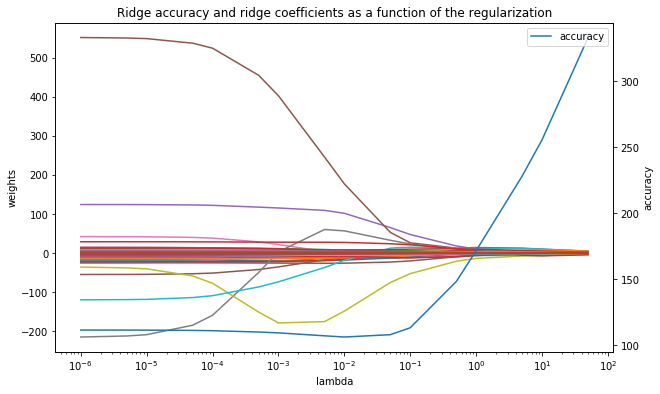

In [4]:
from matplotlib import gridspec

#########################
### Question 2 Part 2 ###
#########################


fig = plt.figure(figsize = (10,10))

# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

# set subplots
ax = fig.add_subplot(gs[0])
az = ax.twinx()

# plot values
ax.plot(lambdas, coefficients)
az.plot(lambdas, average_accuracy)

# set scale for ridge coefficients
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

# set labels for ridge coefficients
ax.set_xlabel('lambda')
ax.set_ylabel('weights')


# set scale for accuracy
az.set_xscale('log')
#az.set_xlim(ax.get_xlim()[::-1])  # reverse axis


# set labels and legend for accuracy
az.set_ylabel('accuracy')
az.legend(['accuracy'], loc=1)


plt.title('Ridge accuracy and ridge coefficients as a function of the regularization')
plt.show()

### Part 3)

How do you interpret the plots above? What can you infer about regularization from them?

As lambda trends towards large values, the penalty function dominates and the coefficients trend towards zero, and away from large differences in weights. Cross validation helps us to determine a "good" value for lambda. The tradeoff between computational complexity and accuracy occurs where the weights trend towards zero and the accuracy lines crosses them.


# Question #3
A series of theoretical questions:

1\) Is regularization particularly useful for high dimensional datasets? Why or why not?

YOUR ANSWER HERE

"In high dimensional data sets, regularization prevents overfitting and allows for the exploitation of low-dimensional structures in the data. Additionally, it lowers the computational penalty of the problem."


2\) Is regularization useful when you are confident that the dimensions are all uniquely predictive? Why or why not?

Regularization can help to determine which features are the most predictive, and ensuring that the most accurate features are utilized to make more accurate predictions.

3\) Why is it important to normalize features when regularizing?

YOUR ANSWER HERE

"The effect of lamda needs to be even across all features. If features are not normalized, then data with different magnitudes would be effected by lambda quite differently."

4\) Why does ridge regression ensure a unique solution when columns are linearly dependent?

YOUR ANSWER HERE

"If the columns are linearly dependent we know that we will have a singluar value for the correlation matrix."